In [1]:
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from deap import algorithms, base, creator, tools

### Small test

In [3]:
creator.create("CoeffMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.CoeffMin)

In [5]:
ind = creator.Individual([1,0,1,0,1])
ind.fitness.values = (sum(ind),)

In [7]:
toolbox = base.Toolbox()
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, std=1.0)

### OneMax

In [2]:
creator.create("FitnessMinOneMax", base.Fitness, weights=(-1.0,))
creator.create("IndividualOneMax", list, fitness=creator.FitnessMinOneMax)

In [ ]:
def evalOneMax(individual):
    return (sum(individual),)

In [3]:
toolboxOneMax = base.Toolbox()
toolboxOneMax.register("attr_bool", random.randint, 0, 1)
toolboxOneMax.register(
    "individual", tools.initRepeat, 
    creator.IndividualOneMax, 
    toolboxOneMax.attr_bool, 
    n=100
)
toolboxOneMax.register("population", tools.initRepeat, list, toolboxOneMax.individual)
toolboxOneMax.register("evaluate", evalOneMax)
toolboxOneMax.register("mate", tools.cxTwoPoint)
toolboxOneMax.register("mutate", tools.mutFlipBit, indpb=0.05)
toolboxOneMax.register("select", tools.selTournament, tournsize=3)

In [4]:
pop = toolboxOneMax.population(n=300)
algorithms.eaSimple(pop, toolboxOneMax, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
print(tools.selBest(pop, k=1))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


### Optimization

In [2]:
ort10_coltar10 = pd.read_csv('ort10_coltar10_mean.csv', header=None).values
ort10_colfeat10 = pd.read_csv('ort10_colfeat10_mean.csv', header=None).values
ort20 = pd.read_csv('ort20_mean.csv', header=None).values
ort5_coltar10_colfeat5 = pd.read_csv('ort5_coltar10_colfeat5_mean.csv', header=None).values
ort5_coltar15 = pd.read_csv('ort5_coltar15_mean.csv', header=None).values
ort10_coltar5_colfeat5 = pd.read_csv('ort10_coltar5_colfeat5_mean.csv', header=None).values
ort5_colfeat15 = pd.read_csv('ort5_colfeat15_mean.csv', header=None).values
ort15_colfeat5 = pd.read_csv('ort15_colfeat5_mean.csv', header=None).values
ort5_coltar5_colfeat10 = pd.read_csv('ort5_coltar5_colfeat10_mean.csv', header=None).values

ort10_coltar10_data = pd.read_csv('ort10_coltar10_data.csv', header=None)
ort10_colfeat10_data = pd.read_csv('ort10_colfeat10_data.csv', header=None)
ort20_data = pd.read_csv('ort20_data.csv', header=None)
ort5_coltar10_colfeat5_data = pd.read_csv('ort5_coltar10_colfeat5_data.csv', header=None)
ort5_coltar15_data = pd.read_csv('ort5_coltar15_data.csv', header=None)
ort10_coltar5_colfeat5_data = pd.read_csv('ort10_coltar5_colfeat5_data.csv', header=None)
ort5_colfeat15_data = pd.read_csv('ort5_colfeat15_data.csv', header=None)
ort15_colfeat5_data = pd.read_csv('ort15_colfeat5_data.csv', header=None)
ort5_coltar5_colfeat10_data = pd.read_csv('ort5_coltar5_colfeat10_data.csv', header=None)

In [3]:
true_results = [
    ort10_coltar10,
    ort10_colfeat10,
    ort20,
    ort5_coltar10_colfeat5,
    ort5_coltar15,
    ort10_coltar5_colfeat5,
    ort5_colfeat15,
    ort15_colfeat5,
    ort5_coltar5_colfeat10
]

In [4]:
datasets = [
    ort10_coltar10_data,
    ort10_colfeat10_data,
    ort20_data,
    ort5_coltar10_colfeat5_data,
    ort5_coltar15_data,
    ort10_coltar5_colfeat5_data,
    ort5_colfeat15_data,
    ort15_colfeat5_data,
    ort5_coltar5_colfeat10_data
]

In [5]:
def evalCoeff(individual, i=1):
    x = np.arange(2, 2 + len(true_results[i]))
    outed = (individual[0] + 
             individual[1] / x + 
             individual[2] / x + 
             individual[3] * np.exp(-1 * x) + 
             individual[4] * np.exp(-1 * x) +
             individual[5] * np.log(np.abs(x)) +
             individual[6] * np.log(np.abs(x)) +
             np.exp(individual[7] + individual[8] * np.log(np.abs(x))) + 
             np.exp(individual[9] + individual[10] * np.log(np.abs(x)))
            )
    
    loss = ((outed - true_results[i][:,-1])**2).mean()
    return (loss,)

In [6]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [9]:
toolbox = base.Toolbox()
toolbox.register("attr_normal", np.random.randn)
toolbox.register(
    "individual", 
    tools.initRepeat, 
    creator.Individual, 
    toolbox.attr_normal, 
    n=11 # num coeffs
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalCoeff, i=1)
toolbox.register("mate", tools.cxBlend, alpha=1)
toolbox.register("mutate", tools.mutUniformInt, low=-5, up=5, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [10]:
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
print(tools.selBest(pop, k=1))

[[1.1019671499960104, -0.7613981908394691, -1.6047325941176505, -1.0008588169707473, 5.976715421736824, -0.10248604159407626, 0.024370153570032214, -1.165876297526808, -0.06886572627000251, 0, -3.952740856335836]]


In [11]:
def GeneticCoeff(i, n=11):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_normal", np.random.randn)
    toolbox.register(
        "individual", 
        tools.initRepeat, 
        creator.Individual, 
        toolbox.attr_normal, 
        n=n # num coeffs
    )
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalCoeff, i=i)
    toolbox.register("mate", tools.cxBlend, alpha=1)
    toolbox.register("mutate", tools.mutUniformInt, low=-5, up=5, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    pop = toolbox.population(n=1000)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
    return tools.selBest(pop, k=1)[0]

In [12]:
def out_print(individual):
    x = np.arange(2, 2 + len(true_results[i]))
    outed = (individual[0] + 
             individual[1] / x + 
             individual[2] / x + 
             individual[3] * np.exp(-1 * x) + 
             individual[4] * np.exp(-1 * x) +
             individual[5] * np.log(np.abs(x)) +
             individual[6] * np.log(np.abs(x)) +
             np.exp(individual[7] + individual[8] * np.log(np.abs(x))) + 
             np.exp(individual[9] + individual[10] * np.log(np.abs(x)))
            )
    return outed

### Pipeline for i = 1

#### Calculation

In [13]:
i = 1

In [14]:
coeffs = GeneticCoeff(i)

/usr/local/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


#### Visualization

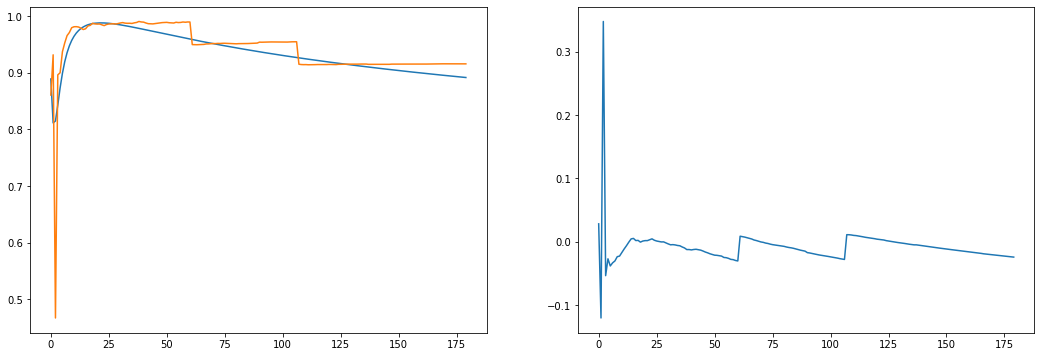

In [15]:
i = 1

fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i][:, -1])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i][:, -1])

### Pipeline for i = 3

#### Calculation

In [16]:
i = 3

In [17]:
coeffs = GeneticCoeff(i)

#### Visualization

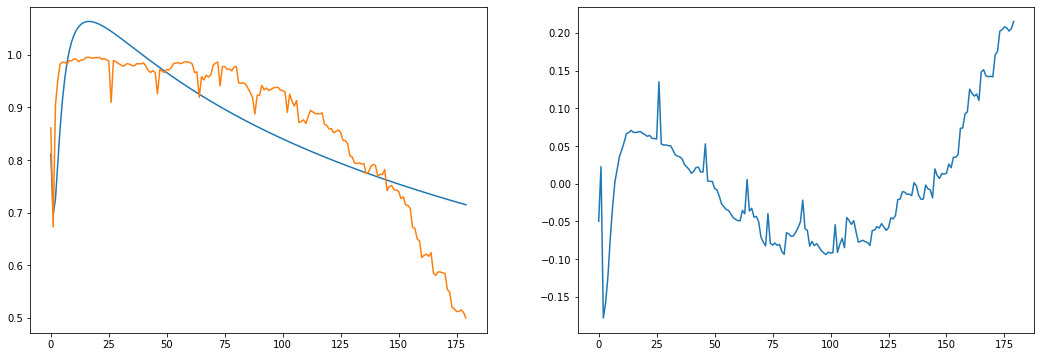

In [18]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i][:, -1])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i][:, -1])

### Pipeline for i = 5

#### Calculation

In [19]:
i = 5

In [20]:
coeffs = GeneticCoeff(i)

#### Visualization

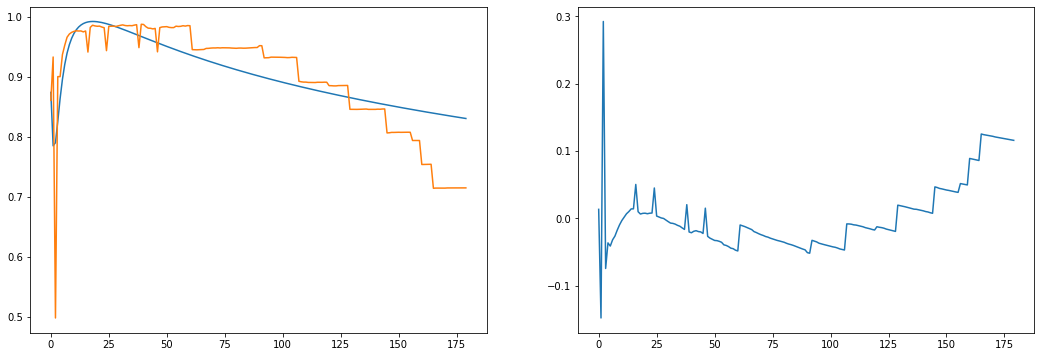

In [21]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i][:, -1])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i][:, -1])

### Pipeline for i = 2

#### Calculation

In [22]:
i = 2

In [23]:
coeffs = GeneticCoeff(i)

#### Visualization

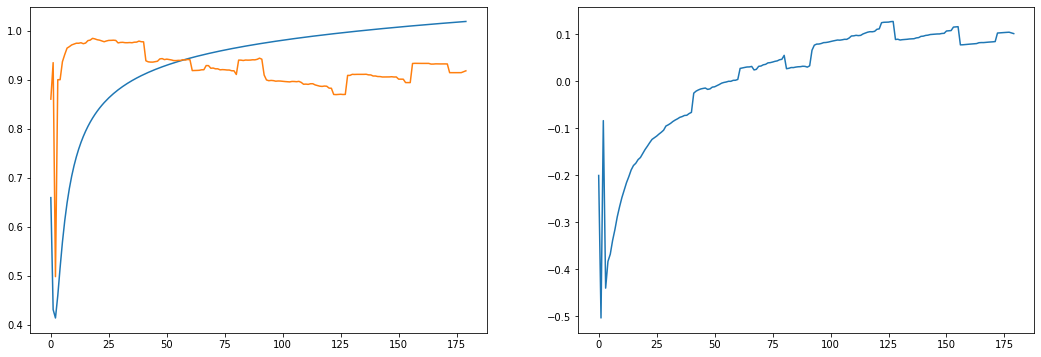

In [24]:
i = 0

fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i][:, -1])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i][:, -1])